## 链家数据分析
我们来根据我们之前爬取的链家网数据，做一点小小的数据分析。

### 0.载入数据

In [1]:
import pandas as pd
lj_data = pd.read_csv('./data/LJdata.csv')

In [3]:
lj_data.head(5)

,区域,地址,标题,户型,面积,价格,楼层,建造时间,朝向,更新时间,看房人数,备注,链接地址
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html


大家规范一点，用英文的column name，这样免去了后续的一些问题(主要是编码问题)

In [4]:
lj_data.columns

Index(['区域', '地址', '标题', '户型', '面积', '价格', '楼层', '建造时间', '朝向', '更新时间', '看房人数',
       '备注', '链接地址'],
      dtype='object')

In [6]:
lj_data.columns = ['district', 'address', 'title', 'house_type', 'area', 'price', 'floor', 'build_time', 'direction', 'update_time', 'view_num', 'extra_info', 'link']

Perfect, 然后咱们就可以开始做点分析了

### 查看数据的形状和信息
hint:都还记得info/describe/shape的用法吧，用起来！

In [7]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html


In [8]:
lj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 13 columns):
district       2760 non-null object
address        2760 non-null object
title          2760 non-null object
house_type     2760 non-null object
area           2760 non-null object
price          2760 non-null int64
floor          2760 non-null object
build_time     2758 non-null object
direction      2760 non-null object
update_time    2760 non-null object
view_num       2760 non-null int64
extra_info     2760 non-null object
link           2760 non-null object
dtypes: int64(2), object(11)
memory usage: 280.4+ KB


In [9]:
lj_data.shape

(2760, 13)

In [10]:
lj_data.describe()

,price,view_num
count,2760.000000,2760.000000
mean,7570.800725,13.448913
std,6316.204986,12.746202
min,1300.000000,0.000000
25%,4500.000000,4.000000
50%,6000.000000,10.000000
75%,8500.000000,19.000000
max,210000.000000,122.000000


In [12]:
# 最贵和最便宜的房子
lj_data.loc[lj_data['price']==210000]

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
2658,和平里租房,雍和家园二期,雍和家园 底商出租 使用面积720米,6室3厅,720平米,210000,低楼层(共6层),2005年建板楼,南,2017.07.26,21,距离2号线雍和宫站293米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101672514.html


In [13]:
lj_data.loc[lj_data['price']==1300]

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
2527,良乡租房,伟业嘉园西里,半地下室 家电齐全 集中供暖 简单装修,1室1厅,46平米,1300,地下室(共5层),2005年建,南,2017.07.19,14,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101538484.html


In [14]:
lj_data[lj_data['price']==lj_data['price'].min()]

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
2527,良乡租房,伟业嘉园西里,半地下室 家电齐全 集中供暖 简单装修,1室1厅,46平米,1300,地下室(共5层),2005年建,南,2017.07.19,14,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101538484.html


In [15]:
lj_data[lj_data['price']==lj_data['price'].max()]

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
2658,和平里租房,雍和家园二期,雍和家园 底商出租 使用面积720米,6室3厅,720平米,210000,低楼层(共6层),2005年建板楼,南,2017.07.26,21,距离2号线雍和宫站293米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101672514.html


In [16]:
lj_data.sort_values(by='price').head(1)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
2527,良乡租房,伟业嘉园西里,半地下室 家电齐全 集中供暖 简单装修,1室1厅,46平米,1300,地下室(共5层),2005年建,南,2017.07.19,14,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101538484.html


In [17]:
lj_data.sort_values(by='price').tail(1)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
2658,和平里租房,雍和家园二期,雍和家园 底商出租 使用面积720米,6室3厅,720平米,210000,低楼层(共6层),2005年建板楼,南,2017.07.26,21,距离2号线雍和宫站293米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101672514.html


### 找到最近更新信息的20套房子

In [18]:
lj_data.sort_values(by='update_time', ascending=False).head(20)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
347,劲松租房,武圣西里,"武圣西里正规三居室,低楼层,看房方便",3室1厅,73平米,6500,低楼层(共6层),1986年建板楼,东南 北,2017.07.27,0,距离10号线潘家园站965米 随时看房,https://bj.lianjia.com/zufang/101101862495.html
1790,广安门租房,恒昌花园,广安门恒昌花园西向三居室集中供暖,3室2厅,159平米,13500,高楼层(共28层),1999年建塔楼,西,2017.07.27,12,距离7号线达官营站292米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101692254.html
2405,武夷花园租房,月亮城堡,月亮城堡精装修正规一居 南北通透 户型好,1室1厅,102平米,4500,低楼层(共11层),2005年建板塔结合,南 北,2017.07.27,28,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101495373.html
2639,常营租房,北京像素南区,北京像素 地铁6号线草房 北向开间,1房间1卫,48平米,3750,低楼层(共23层),2012年建板塔结合,北,2017.07.27,3,距离6号线草房站66米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101852394.html
2366,马甸租房,北太平庄路,牡丹园精装一居室 可当两居 350米到10号线 南北通透,1室1厅,33平米,4000,低楼层(共5层),1985年建板楼,南,2017.07.27,24,距离10号线牡丹园站335米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101622752.html
405,东直门租房,海运仓小区,东四十条海运仓小区精装两居室诚意出租！,2室1厅,64平米,8500,中楼层(共8层),2002年建板楼,东 西,2017.07.27,32,距离2号线东四十条站808米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101731530.html
2538,四季青租房,观澜国际,观澜国际 带车位 二改三 家电齐全,3室1厅,122平米,13000,低楼层(共16层),2004年建板楼,南 北,2017.07.27,13,距离10号线车道沟站333米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101613246.html
407,武夷花园租房,京贸国际城西区,京贸国际城西区 全南两居室 家具家电齐全,2室1厅,91平米,4100,高楼层(共35层),2011年建塔楼,南,2017.07.27,30,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101708896.html
2033,知春路租房,罗庄西里,罗庄西里两居室中等装修拎包即住,2室1厅,86平米,8200,高楼层(共18层),1998年建塔楼,东南,2017.07.27,18,距离10号线知春路站698米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101414799.html
273,小西天租房,文慧园北路26号院,小西天积水潭 文慧园北路26号院精装双南二居拎包入住,2室0厅,55平米,5000,中楼层(共14层),1989年建塔楼,南,2017.07.27,22,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101777561.html


In [19]:
lj_data['update_time'].unique()

array(['2017.07.21', '2017.07.23', '2017.07.20', '2017.07.25',
       '2017.07.26', '2017.07.16', '2017.07.22', '2017.07.24',
       '2017.07.27', '2017.07.19', '2017.07.14', '2017.07.15',
       '2017.07.17', '2017.07.18'], dtype=object)

### 平均看房人数

In [20]:
lj_data['view_num'].mean()

13.44891304347826

In [21]:
lj_data['view_num'].median()

10.0

In [23]:
tmp_df = lj_data['view_num'].value_counts().to_frame().reset_index()

In [25]:
tmp_df.columns = ['view_num', 'count']

In [27]:
tmp_df.sort_values(by='view_num', inplace=True)

In [28]:
tmp_df.head()

,view_num,count
0,0,152
1,1,149
3,2,143
5,3,129
2,4,147


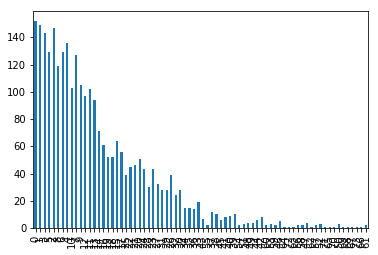

In [30]:
%matplotlib inline
tmp_df['count'].plot(kind='bar')

### 房龄最小的20套房子的平均看房人数、平均面积...

In [31]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html


In [36]:
def get_front_4_num(x):
    try:
        return int(x[:4])
    except:
        return -1

lj_data.loc[:,'house_age'] = 2018-lj_data['build_time'].apply(get_front_4_num)

In [37]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,house_age
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800.0,中楼层(共6层),1981年建板楼,南,2017.07.21,26.0,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800.0,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33.0,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000.0,低楼层(共25层),2006年建塔楼,东,2017.07.20,34.0,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300.0,低楼层(共13层),2004年建板楼,东南,2017.07.25,30.0,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,14
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400.0,高楼层(共16层),1982年建塔楼,南,2017.07.26,30.0,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,36


In [39]:
lj_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2761 entries, 0 to house_age
Data columns (total 14 columns):
district       2760 non-null object
address        2760 non-null object
title          2760 non-null object
house_type     2760 non-null object
area           2760 non-null object
price          2760 non-null float64
floor          2760 non-null object
build_time     2758 non-null object
direction      2760 non-null object
update_time    2760 non-null object
view_num       2760 non-null float64
extra_info     2760 non-null object
link           2760 non-null object
house_age      2761 non-null int64
dtypes: float64(2), int64(1), object(11)
memory usage: 323.6+ KB


In [48]:
lj_data = lj_data[lj_data['area'].notnull()]

In [49]:
lj_data.shape

(2760, 14)

In [ ]:
#def tran_area_format(x):
#    return x[:-2]

In [50]:
lj_data.loc[:,'area'] = lj_data['area'].apply(lambda x: x[:-2]).apply(lambda x:float(x))

In [51]:
lj_data.sort_values(by='house_age').head(20)[['view_num','area']].mean()

view_num      8.45
area        106.00
dtype: float64

### 房子价格的分布(平均，方差，中位数)

In [53]:
import numpy as np
print(lj_data['price'].mean())

7570.80072464


In [54]:
print(lj_data['price'].std())
print(lj_data['price'].median())

6316.20498607
6000.0


### 最受欢迎的朝向(平均看房人数)

In [57]:
popular_direction = lj_data.groupby('direction')[['view_num']].sum()

In [61]:
popular_direction = popular_direction.reset_index()

In [62]:
popular_direction[popular_direction['view_num']==popular_direction['view_num'].max()]

,direction,view_num
23,南 北,11785.0


### 房型数量分布

In [63]:
house_type_dis = lj_data.groupby(['house_type']).count()

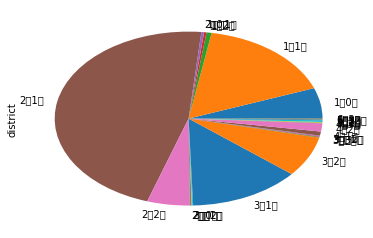

In [65]:
%matplotlib inline
house_type_dis['district'].plot(kind='pie')

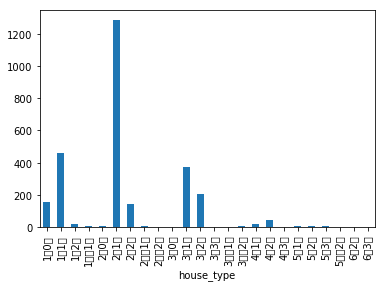

In [66]:
%matplotlib inline
house_type_dis['district'].plot(kind='bar')

### 最受欢迎的房型

In [69]:
tmp = lj_data.groupby('house_type').agg({'view_num':'sum'})

In [74]:
tmp = tmp.reset_index()

In [76]:
tmp[tmp['view_num']==tmp['view_num'].max()]

,house_type,view_num
5,2室1厅,17589.0


### 房子的平均租房价格(按平米算)

In [77]:
lj_data.loc[:,'price_per_m2'] = lj_data['price']/lj_data['area']

In [80]:
lj_data['price_per_m2'].mean()

87.722684299004541

### 最受关注的小区

In [81]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,house_age,price_per_m2
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50.0,5800.0,中楼层(共6层),1981年建板楼,南,2017.07.21,26.0,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37,116.000000
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79.0,7800.0,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33.0,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13,98.734177
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86.0,8000.0,低楼层(共25层),2006年建塔楼,东,2017.07.20,34.0,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12,93.023256
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103.0,5300.0,低楼层(共13层),2004年建板楼,东南,2017.07.25,30.0,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,14,51.456311
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63.0,6400.0,高楼层(共16层),1982年建塔楼,南,2017.07.26,30.0,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,36,101.587302


In [85]:
address_df = lj_data[['address','view_num']].groupby(['address']).sum()
address_df = address_df.reset_index()
address_df.sort_values(by='view_num', ascending=False)

,address,view_num
951,清芷园,246.0
369,卡布其诺,245.0
938,润枫水尚,217.0
1149,芍药居北里,194.0
743,新康园,186.0
1288,远洋山水,184.0
342,华贸城,176.0
15,万国城MOMA,176.0
1460,龙华园,171.0
1182,荣丰2008,170.0


### 出租房源最多的小区

In [89]:
tmp_df2 = lj_data[['address','view_num']].groupby(['address']).count()
tmp_df2 = tmp_df2.reset_index()

In [91]:
tmp_df2.columns =  ['address','count']

In [93]:
tmp_df2.nlargest(columns='count', n=1)

,address,count
1288,远洋山水,19


### 出租房源最多的地区(大家从详情页可以对标到 海淀/西城/东城/朝阳 不同城区...)

In [94]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,house_age,price_per_m2
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50.0,5800.0,中楼层(共6层),1981年建板楼,南,2017.07.21,26.0,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37,116.000000
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79.0,7800.0,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33.0,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13,98.734177
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86.0,8000.0,低楼层(共25层),2006年建塔楼,东,2017.07.20,34.0,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12,93.023256
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103.0,5300.0,低楼层(共13层),2004年建板楼,东南,2017.07.25,30.0,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,14,51.456311
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63.0,6400.0,高楼层(共16层),1982年建塔楼,南,2017.07.26,30.0,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,36,101.587302


### 集中供暖和非集中供暖的有多少家，平均价格是多少

In [97]:
def center_heating(x):
    return 1 if "集中供暖" in x else 0

lj_data.loc[:,'center_heating'] = lj_data['extra_info'].apply(lambda x:center_heating(x))

In [98]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,house_age,price_per_m2,center_heating
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50.0,5800.0,中楼层(共6层),1981年建板楼,南,2017.07.21,26.0,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37,116.000000,1
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79.0,7800.0,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33.0,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13,98.734177,1
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86.0,8000.0,低楼层(共25层),2006年建塔楼,东,2017.07.20,34.0,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12,93.023256,0
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103.0,5300.0,低楼层(共13层),2004年建板楼,东南,2017.07.25,30.0,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,14,51.456311,1
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63.0,6400.0,高楼层(共16层),1982年建塔楼,南,2017.07.26,30.0,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,36,101.587302,1


In [99]:
lj_data['center_heating'].value_counts()

1    2284
0     476
Name: center_heating, dtype: int64

In [100]:
lj_data[['center_heating','price']].groupby('center_heating').mean()

,price
center_heating,
0,7317.436975
1,7623.603327


### 哪个城区的租房价格最贵，平均价格是多少

### 不同房型的平均/最大/最小面积

In [103]:
house_type_info = lj_data[['house_type','area']].groupby("house_type")\
.agg({"area":{'mean':np.mean, 'max':np.max, 'min':np.min}})

In [104]:
house_type_info

area              
                  mean    min    max
house_type                          
1室0厅         48.484076   19.0  140.0
1室1厅         54.669584   28.0  107.0
1室2厅         72.411765   45.0  109.0
1房间1卫        42.875000   35.0   48.0
2室0厅         49.888889   42.0   55.0
2室1厅         78.725857   26.0  194.0
2室2厅        106.028169   60.0  228.0
2房间1卫        60.166667   52.0   67.0
2房间2卫        37.000000   36.0   38.0
3室0厅         67.000000   61.0   70.0
3室1厅        114.237197   54.0  217.0
3室2厅        145.690821   79.0  255.0
3室3厅        144.000000  123.0  181.0
3房间1卫        85.333333   77.0   91.0
3房间2卫        46.750000   39.0   63.0
4室1厅        165.285714   87.0  330.0
4室2厅        196.333333  119.0  304.0
4室3厅        179.000000  150.0  237.0
5室1厅        138.250000   99.0  180.0
5室2厅        242.125000  181.0  332.0
5室3厅        191.600000  135.0  219.0
5房间2卫       158.000000  158.0  158.0
6室2厅        274.000000  232.0  316.0
6室3厅        720.000000  720.0  720.0

### 哪个地铁口附近的房子最多

In [105]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,house_age,price_per_m2,center_heating
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50.0,5800.0,中楼层(共6层),1981年建板楼,南,2017.07.21,26.0,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37,116.000000,1
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79.0,7800.0,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33.0,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13,98.734177,1
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86.0,8000.0,低楼层(共25层),2006年建塔楼,东,2017.07.20,34.0,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12,93.023256,0
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103.0,5300.0,低楼层(共13层),2004年建板楼,东南,2017.07.25,30.0,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,14,51.456311,1
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63.0,6400.0,高楼层(共16层),1982年建塔楼,南,2017.07.26,30.0,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,36,101.587302,1


In [106]:
import re

In [119]:
#距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖
def find_sub_station(x):
    try:
        return re.search(pattern="(.+号线)(.+站)([0-9]+)米", string=x).group(2)
    except:
        return None

In [120]:
lj_data.loc[:,'sub_station'] = lj_data['extra_info'].apply(find_sub_station)

In [121]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,house_age,price_per_m2,center_heating,sub_station
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50.0,5800.0,中楼层(共6层),1981年建板楼,南,2017.07.21,26.0,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37,116.000000,1,None
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79.0,7800.0,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33.0,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13,98.734177,1,(东段)东湖渠站
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86.0,8000.0,低楼层(共25层),2006年建塔楼,东,2017.07.20,34.0,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12,93.023256,0,达官营站
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103.0,5300.0,低楼层(共13层),2004年建板楼,东南,2017.07.25,30.0,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,14,51.456311,1,天通苑站
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63.0,6400.0,高楼层(共16层),1982年建塔楼,南,2017.07.26,30.0,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,36,101.587302,1,团结湖站


In [122]:
lj_data[['sub_station','link']].groupby('sub_station').count()

,link
sub_station,
(东段)东湖渠站,21
(东段)东风北桥站,13
(东段)北工大西门站,8
(东段)将台站,14
(东段)方庄站,13
(东段)景泰站,8
(东段)望京南站,4
(东段)朝阳公园站,19
(东段)来广营站,5


### 地铁附近的房子平均价格 比 非地铁的高多少

In [123]:
def has_sub_station(x):
    return 1 if "距离" in x else 0

lj_data.loc[:,'has_sub_station'] = lj_data['extra_info'].apply(has_sub_station)

In [124]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,house_age,price_per_m2,center_heating,sub_station,has_sub_station
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50.0,5800.0,中楼层(共6层),1981年建板楼,南,2017.07.21,26.0,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37,116.000000,1,None,0
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79.0,7800.0,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33.0,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13,98.734177,1,(东段)东湖渠站,1
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86.0,8000.0,低楼层(共25层),2006年建塔楼,东,2017.07.20,34.0,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12,93.023256,0,达官营站,1
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103.0,5300.0,低楼层(共13层),2004年建板楼,东南,2017.07.25,30.0,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,14,51.456311,1,天通苑站,1
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63.0,6400.0,高楼层(共16层),1982年建塔楼,南,2017.07.26,30.0,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,36,101.587302,1,团结湖站,1


In [125]:
lj_data[['has_sub_station','price']].groupby('has_sub_station').agg('mean')

,price
has_sub_station,
0,6106.436464
1,8520.800478


### 地铁附近的房源离地铁平均距离

In [126]:
#距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖
def cal_sub_station_distance(x):
    try:
        return int(re.search(pattern="(.+号线)(.+站)([0-9]+)米", string=x).group(3))
    except:
        return None

lj_data.loc[:,'distance'] = lj_data['extra_info'].apply(cal_sub_station_distance)

In [127]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,house_age,price_per_m2,center_heating,sub_station,has_sub_station,distance
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50.0,5800.0,中楼层(共6层),1981年建板楼,南,2017.07.21,26.0,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37,116.000000,1,None,0,NaN
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79.0,7800.0,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33.0,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13,98.734177,1,(东段)东湖渠站,1,731.0
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86.0,8000.0,低楼层(共25层),2006年建塔楼,东,2017.07.20,34.0,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12,93.023256,0,达官营站,1,684.0
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103.0,5300.0,低楼层(共13层),2004年建板楼,东南,2017.07.25,30.0,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,14,51.456311,1,天通苑站,1,927.0
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63.0,6400.0,高楼层(共16层),1982年建塔楼,南,2017.07.26,30.0,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,36,101.587302,1,团结湖站,1,88.0


In [128]:
lj_data['distance'].mean()

709.11823647294591

### 最多的在租楼层

In [129]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,house_age,price_per_m2,center_heating,sub_station,has_sub_station,distance
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50.0,5800.0,中楼层(共6层),1981年建板楼,南,2017.07.21,26.0,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37,116.000000,1,None,0,NaN
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79.0,7800.0,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33.0,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13,98.734177,1,(东段)东湖渠站,1,731.0
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86.0,8000.0,低楼层(共25层),2006年建塔楼,东,2017.07.20,34.0,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12,93.023256,0,达官营站,1,684.0
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103.0,5300.0,低楼层(共13层),2004年建板楼,东南,2017.07.25,30.0,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,14,51.456311,1,天通苑站,1,927.0
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63.0,6400.0,高楼层(共16层),1982年建塔楼,南,2017.07.26,30.0,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,36,101.587302,1,团结湖站,1,88.0


In [130]:
def get_floor(x):
    if '低楼层' in x:
        return '低楼层'
    elif '中楼层' in x:
        return '中楼层'
    else:
        return '高楼层'

lj_data.loc[:,'floor'] = lj_data['extra_info'].apply(get_floor)

### 不同地区的房龄分布

### 直接看房的房子比例

In [ ]:
def get_info(x):
    return 1 if "随时看房" in x else 0



### 有电梯和无电梯的房子数量

### 有电梯和无电梯房子情况(面积/价格/朝向/带看人数)分布

### 附加信息里主要有哪几类信息，覆盖多少百分比的房子

In [ ]:
# 分割附加信息，怎么合理分列（识别信息类别），然后就可以看覆盖百分比了。